In [1]:
import numpy as np
import os
import pandas as pd
from utils import sample_k_movies
from MAB_class import MABAgent, LinUCB_MABAgent
import random
import matplotlib.pyplot as plt

In [2]:
# Loading the data

movies_data_path = os.path.join(os.path.pardir, 'data/processed_data.csv') 
movies_data = pd.read_csv(movies_data_path)

In [3]:
# Load ratings data
path_ratings = os.path.join(os.path.pardir, 'data/ratings.csv')
ratings_df = pd.read_csv(path_ratings)

# Preparing the datasets for the agents
ratings = ratings_df['rating'].to_numpy()
movieId_of_rating = ratings_df['movieId'].to_numpy()
movie_ids = set(ratings_df['movieId'].unique().tolist())

<strong> Constructing a dictionnary that matches movies ID to their title </strong>

In [4]:
# Dictionnary that macthes moviesID to their original title
movieId_title = dict()

titles = movies_data['original_title'].tolist()
movieId = movies_data['movieId'].tolist()

for title, id in zip(titles, movieId):
    movieId_title[id] = title

In [5]:
# Extracting only the movies we will be using and keeping just the relevant columnns

movies_data = movies_data[movies_data['movieId'].isin(movie_ids)]
movies_indices = movies_data['movieId'].to_numpy()
movies_data = movies_data[['movieId', 'original_title']]

In [6]:
movies_data.head()

,movieId,original_title
0,318,The Million Dollar Hotel
1,296,Terminator 3: Rise of the Machines
2,593,Солярис
3,260,The 39 Steps
4,480,Monsoon Wedding


## <strong><font color='red'> <div align='center'> I will first experiment with 100 movies </font></div></strong>

In [7]:
from MAB_class import UCB_MABAgent, TS_MABAgent, EXP3_MABAgent

# Define number of movies
n_movies = len(movies_indices)
n_rounds = 10000
n_actions = 100
indices = random.sample([i for i in range(n_movies)], n_actions)

# Define the datasets that will be used to train the agents
movies_id_k = movies_indices[indices]
mask = [i for i in range(movieId_of_rating.size) if movieId_of_rating[i] in movies_id_k]
movieId_of_rating_k = movieId_of_rating[mask]
ratings_k = ratings[mask]

max_reward = 5
true_rewards = ratings_k

rewardsXmovie_indices = movieId_of_rating_k 
actionXmovie_indices = movies_id_k

sigma = 1
eta = 0.5

UCB_agent = UCB_MABAgent(n_rounds, n_actions, max_reward, true_rewards, rewardsXmovie_indices, actionXmovie_indices)
TS_agent = TS_MABAgent(n_rounds, n_actions, sigma, max_reward, true_rewards, rewardsXmovie_indices, actionXmovie_indices)
EXP_agent = EXP3_MABAgent(eta, n_rounds, n_actions, max_reward, true_rewards, rewardsXmovie_indices, actionXmovie_indices)

<strong> Let run the UCB Agent on our selected movies dataset </strong>

In [8]:
cumulative_regret_ucb = UCB_agent.run()

<strong> Let now run the Thompson Sampling Agent on our selected movies dataset </strong>

In [9]:
cumulative_regret_ts = TS_agent.run()

<strong> Let now run the EXP3 Agent on our selected movies dataset </strong>

In [10]:
cumulative_regret_exp = EXP_agent.run()

<strong> Plotting the cumulative regret for both agents </strong>

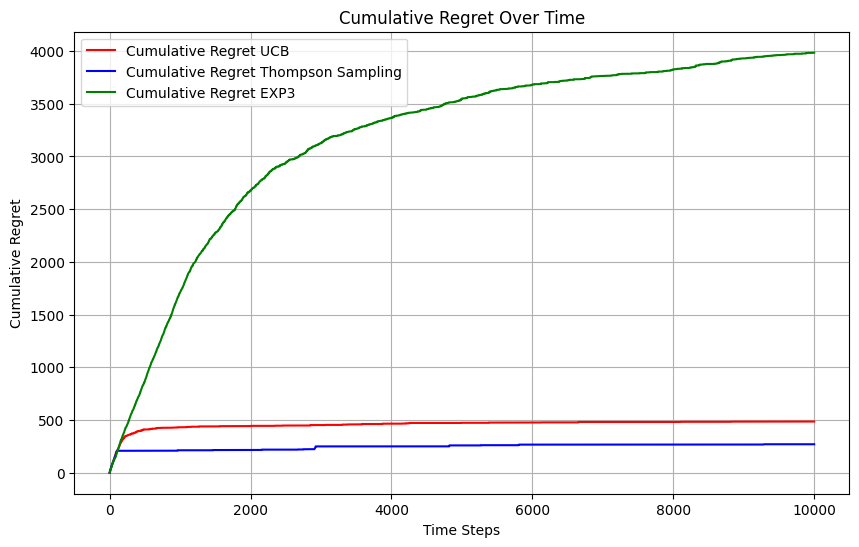

In [11]:
time_steps_ts = range(len(cumulative_regret_ts))  # Assuming each entry corresponds to a time step
time_steps_ucb = range(len(cumulative_regret_ucb))  # Assuming each entry corresponds to a time step
time_steps_exp = range(len(cumulative_regret_exp))  # Assuming each entry corresponds to a time step

# Plotting  
plt.figure(figsize=(10, 6))
plt.plot(time_steps_ts, cumulative_regret_ts, linestyle='-', color='r', label='Cumulative Regret UCB')
plt.plot(time_steps_ucb, cumulative_regret_ucb, linestyle='-', color='b', label='Cumulative Regret Thompson Sampling')
plt.plot(time_steps_exp, cumulative_regret_exp, linestyle='-', color='g', label='Cumulative Regret EXP3')

# Customizing the plot
plt.title('Cumulative Regret Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<strong> Let see movies ratings at this stage for each agent </strong>

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_30224\3158310670.py:35: UserWarning: Glyph 35064 (\N{CJK UNIFIED IDEOGRAPH-88F8}) missing from current font.
  plt.tight_layout()
C:\Users\Mrabe\AppData\Local\Temp\ipykernel_30224\3158310670.py:35: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
C:\Users\Mrabe\AppData\Local\Temp\ipykernel_30224\3158310670.py:35: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from current font.
  plt.tight_layout()
C:\Users\Mrabe\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35064 (\N{CJK UNIFIED IDEOGRAPH-88F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mrabe\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mrabe\AppData\Roaming\Python\Python311\site

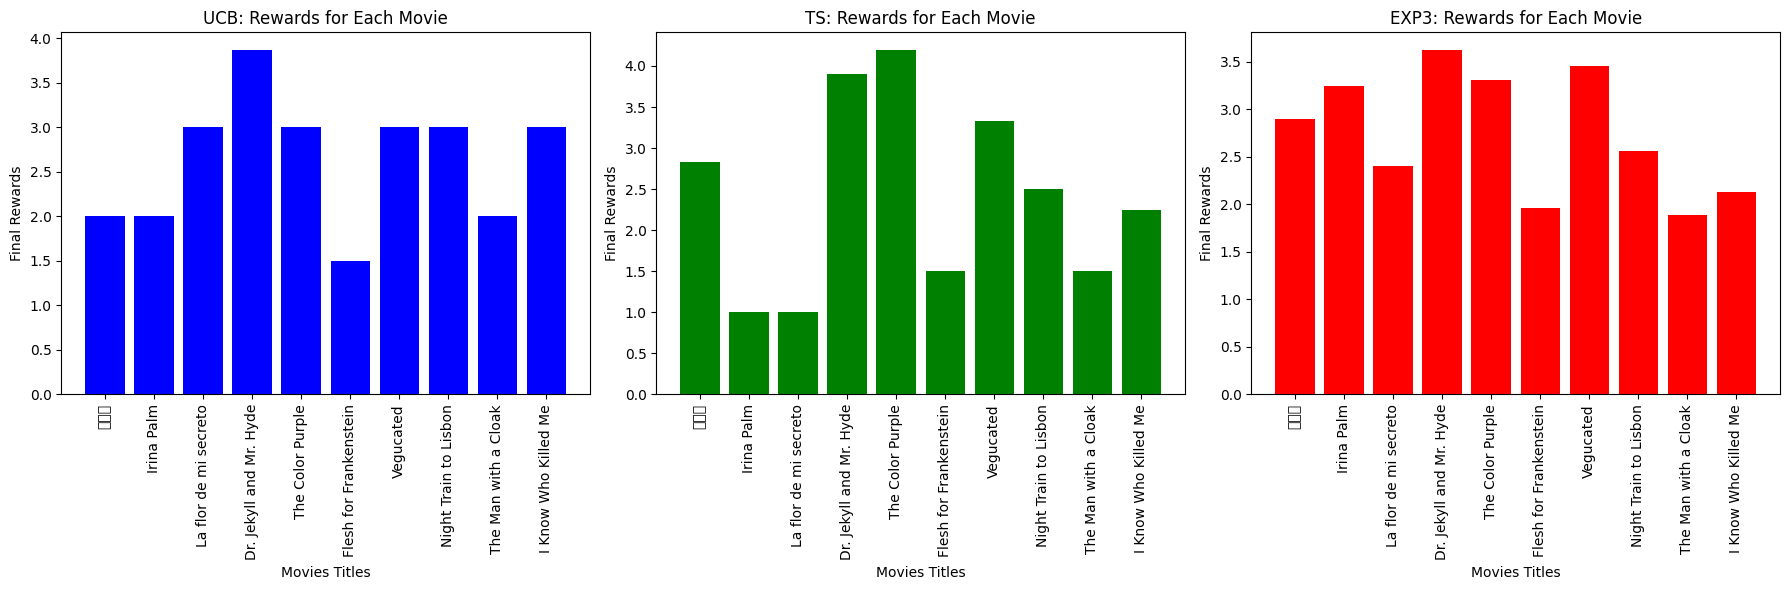

In [12]:
ucb_ratings = UCB_agent.total_reward / UCB_agent.action_counts
ts_ratings = TS_agent.total_reward / TS_agent.action_counts
exp_ratings = EXP_agent.total_reward / EXP_agent.action_counts  

movies_titles = [movieId_title[id] for id in movies_id_k]

# To make it visually better

n_samples = 10

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted to 3 columns

# Plot for UCB
axes[0].bar(movies_titles[:n_samples], ucb_ratings[:n_samples], color='blue')
axes[0].set_xlabel('Movies Titles')
axes[0].set_ylabel('Final Rewards')
axes[0].set_title('UCB: Rewards for Each Movie')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Thompson Sampling (TS)
axes[1].bar(movies_titles[:n_samples], ts_ratings[:n_samples], color='green')
axes[1].set_xlabel('Movies Titles')
axes[1].set_ylabel('Final Rewards')
axes[1].set_title('TS: Rewards for Each Movie')
axes[1].tick_params(axis='x', rotation=90)

# Plot for EXP3
axes[2].bar(movies_titles[:n_samples], exp_ratings[:n_samples], color='red')
axes[2].set_xlabel('Movies Titles')
axes[2].set_ylabel('Final Rewards')
axes[2].set_title('EXP3: Rewards for Each Movie')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()